In [16]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import pandas as pd
import csv
from glob import glob
from tqdm import tqdm
import sklearn
import scipy
import skimage
from skimage.transform import resize

# Importaciones de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, backend as K
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.utils import to_categorical

# Para el manejo de datos y métricas
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
from sklearn.utils import class_weight, shuffle
from sklearn.metrics import confusion_matrix, accuracy_score

# Si necesitas balanceo de clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

In [17]:
# Tamaño de imagen
imageSize = 50

# Directorios (ajusta la ruta si es necesario)
train_dir = "Data/asl_alphabet_train/"
test_dir =  ".Data/asl_alphabet_test/"

def get_data(folder):
    """
    Carga las imágenes y sus etiquetas desde el folder indicado.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        # Evita carpetas o archivos "ocultos" (en Unix empiezan con '.')
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28
            else:
                label = 29
            
            path_folder = os.path.join(folder, folderName)
            for image_filename in tqdm(os.listdir(path_folder)):
                img_path = os.path.join(path_folder, image_filename)
                img_file = cv2.imread(img_path)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y

# Carga de datos
X_data, y_data = get_data(train_dir)
# (Opcional) Carga de datos de test si hace falta (hay muy pocas imágenes en test):
# X_test_folder, y_test_folder = get_data(test_dir)

# Separación en train/test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Codificación one-hot
num_classes = 30
y_train_hot = to_categorical(y_train, num_classes=num_classes)
y_test_hot  = to_categorical(y_test,  num_classes=num_classes)

100%|██████████| 3000/3000 [00:06<00:00, 456.49it/s]


In [18]:
X_train, y_train_hot = shuffle(X_train, y_train_hot, random_state=13)
X_test,  y_test_hot  = shuffle(X_test,  y_test_hot,  random_state=13)

# Submuestreo si se quiere entrenar rápido (puedes ajustar o eliminar)
X_train = X_train[:30000]
X_test  = X_test[:30000]
y_train_hot = y_train_hot[:30000]
y_test_hot  = y_test_hot[:30000]

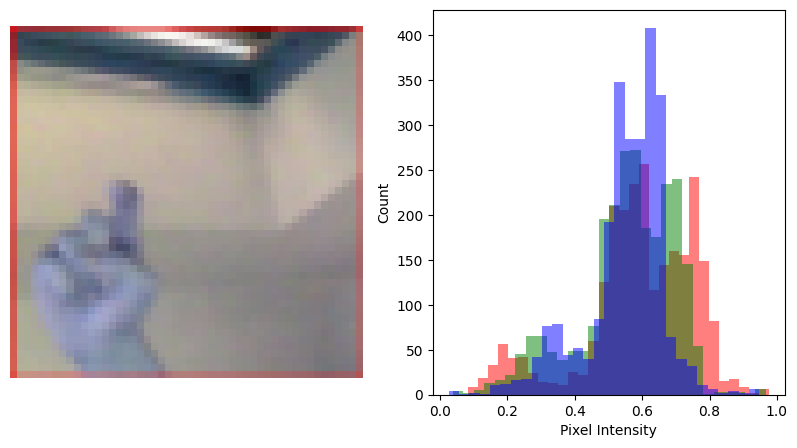

In [19]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[1])

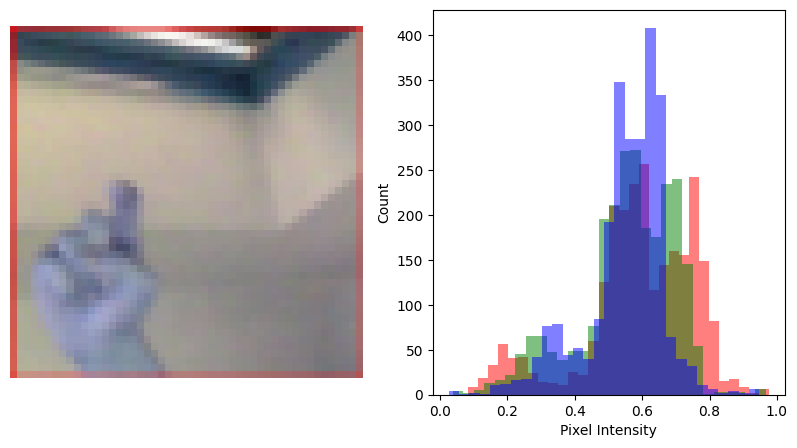

In [20]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[1])


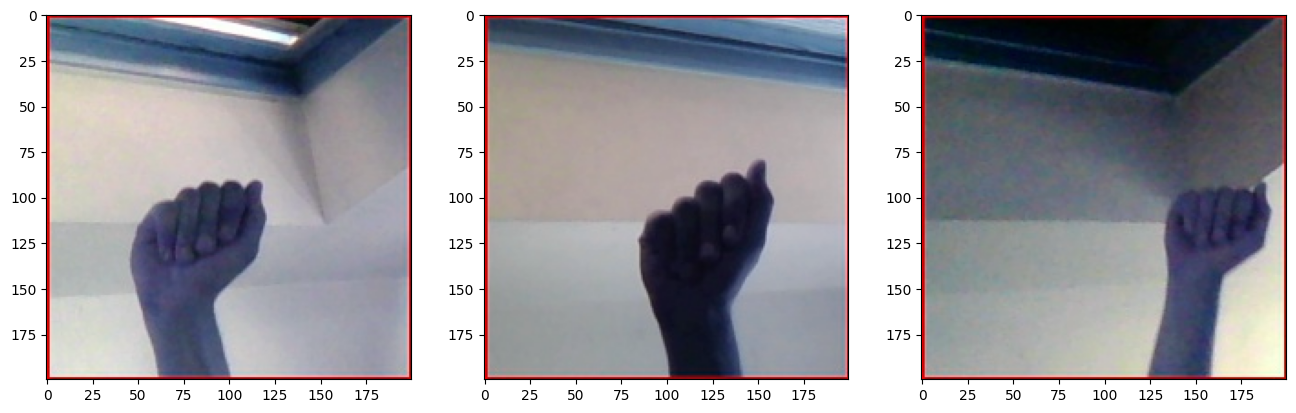

In [21]:
multipleImages = glob('Data/asl_alphabet_train/A/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))
    #;
plotThreeImages(multipleImages)

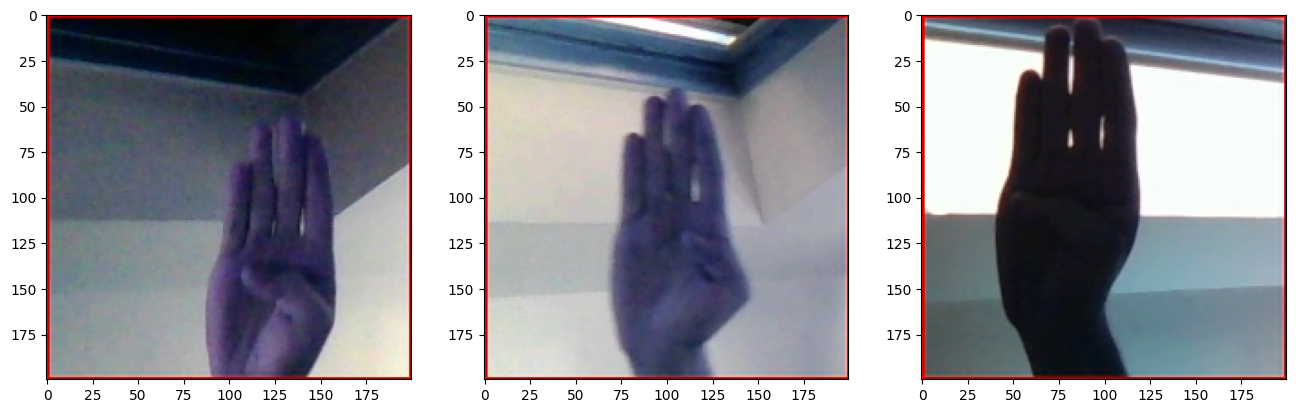

In [22]:
multipleImages = glob('Data/asl_alphabet_train/B/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))
    #;
plotThreeImages(multipleImages)

A


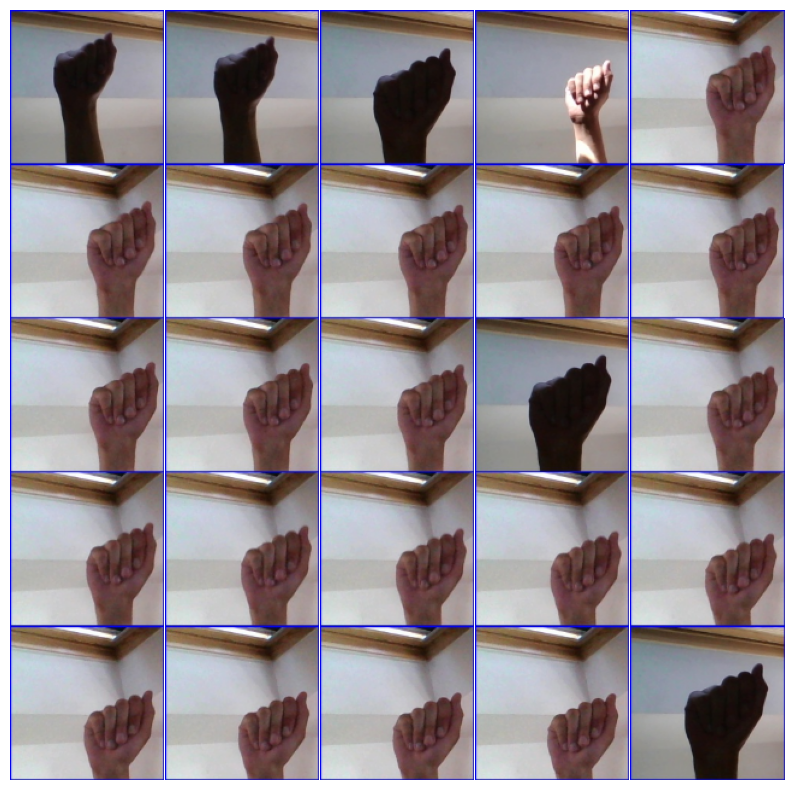

In [23]:
print("A")
multipleImages = glob('Data/asl_alphabet_train/A/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}


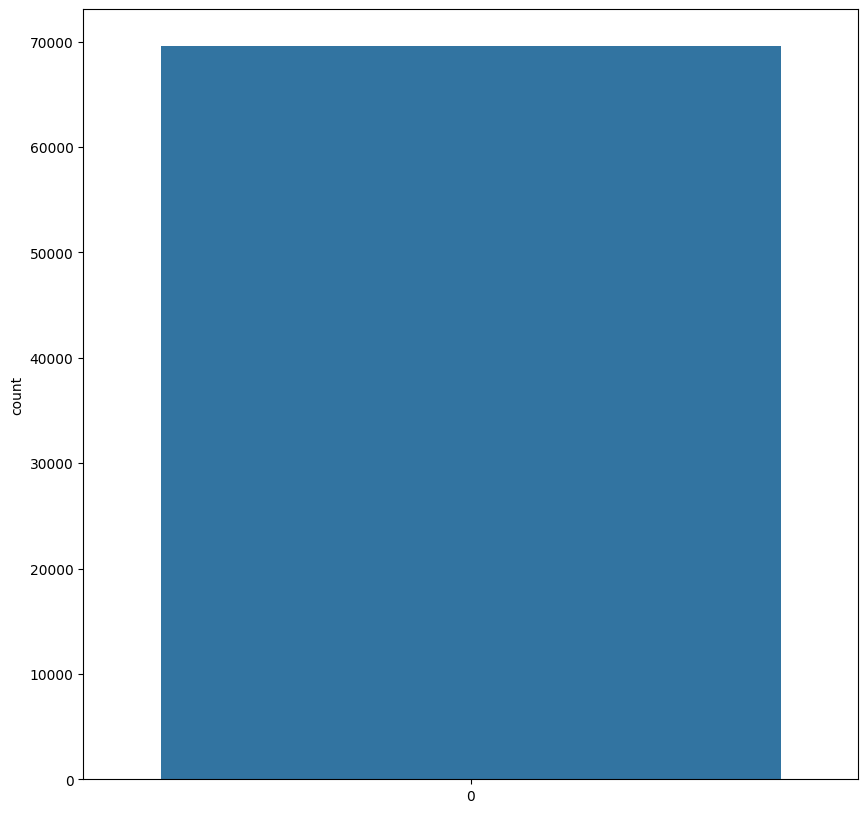

In [24]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

## Evaluación del modelo

In [25]:
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback para guardar métricas tras cada epoch."""
    def __init__(self, savepath='logs.npy'):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    """
    Lee el diccionario de logs guardado en logs.npy y grafica las curvas
    de entrenamiento y validación para 'accuracy' o 'loss'.
    """
    # En TF2 hay que habilitar allow_pickle=True
    metrics = np.load('logs.npy', allow_pickle=True).item()
    plt.figure(figsize=(10,5))
    
    # Puedes ajustar aquí qué quieres filtrar (por ejemplo, 'loss' u 'accuracy')
    filt = ['accuracy']  
    for k in filter(lambda x: any(kk in x for kk in filt), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c='r' if 'val' not in k else 'b', label=('val' if 'val' in k else 'train'))
        # Escoge mínimo si es 'loss', máximo si es 'accuracy'
        if 'loss' in k:
            x = np.argmin(l)
        else:
            x = np.argmax(l)
        y = l[x]
        plt.scatter(x, y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x, y), size='15',
                 color=('r' if 'val' not in k else 'b'))
    
    plt.legend(loc=4)
    plt.grid()
    plt.xlabel('Épocas')
    plt.ylabel('Métrica')
    plt.title('Curvas de aprendizaje')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función muestra la matriz de confusión.
    Con normalize=True se normaliza por filas.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')


def plot_learning_curve(history):
    """
    Grafica la evolución de la accuracy y el loss a lo largo del entrenamiento.
    """
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train acc')
    plt.plot(history.history['val_accuracy'], label='Val acc')
    plt.title('Precisión del modelo')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Val loss')
    plt.title('Pérdida del modelo')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


In [26]:
map_characters1 = map_characters
class_weight1 = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
#convertimos a un diccionario
class_weight1 = dict(enumerate(class_weight1))
# Rutas a pesos pre-entrenados
weight_path_vgg = 'Data/Keras_models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# weight_path_inc = '../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Instancia del modelo pre-entrenado VGG16
pretrained_model_vgg = VGG16(weights=weight_path_vgg,
                             include_top=False,
                             input_shape=(imageSize, imageSize, 3))

# Definición de optimizadores
optimizer1 = tf.keras.optimizers.Adam()
# Ejemplo de otro optimizador
optimizer2 = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

def pretrainedNetwork(xtrain, ytrain, xtest, ytest,
                      base_model,
                      classweight,
                      numclasses,
                      numepochs,
                      optimizer,
                      labels=None):
    """
    Entrena una red con un modelo base preentrenado (e.g. VGG16).
    """
    # Congelar capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Añadir capas "top" al modelo preentrenado
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(numclasses, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    # Callback para early stopping
    callbacks_list = [
        EarlyStopping(monitor='val_accuracy', patience=3, verbose=1),
        MetricsCheckpoint('logs.npy')
    ]
    
    model.summary()

    # Entrenamiento
    history = model.fit(xtrain, ytrain,
                        epochs=numepochs,
                        class_weight=class_weight1,
                        validation_data=(xtest, ytest),
                        verbose=1,
                        callbacks=callbacks_list)

    # Evaluación
    score = model.evaluate(xtest, ytest, verbose=0)
    print('\n>> Accuracy en test: {:.4f}'.format(score[1]))

    # Predicciones
    y_pred = model.predict(xtest)
    Y_pred_classes = np.argmax(y_pred, axis=1)
    Y_true = np.argmax(ytest, axis=1)

    # (Opcional) Si tienes un dict de etiquetas
    if labels is not None:
        from sklearn.metrics import classification_report
        print('\n', classification_report(Y_true, Y_pred_classes))
        # O, si labels es un dict, puedes mapear cada índice a su string
        # print('\n', classification_report(Y_true, Y_pred_classes,
        #         target_names=list(labels.values())))

    # Matriz de confusión
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

    # Gráficas
    plotKerasLearningCurve()
    plot_learning_curve(history)
    plot_confusion_matrix(confusion_mtx,
                          classes=list(labels.values()) if labels else range(numclasses))
    
    return model


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,730,078 (56.19 MB)

 Trainable params: 15,390 (60.12 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.3490 - loss: 2.6873 - val_accuracy: 0.6746 - val_loss: 1.6221
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.7103 - loss: 1.4625 - val_accuracy: 0.7660 - val_loss: 1.1779
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.7821 - loss: 1.0951 - val_accuracy: 0.8009 - val_loss: 0.9556
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 101ms/step - accuracy: 0.8236 - loss: 0.8916 - val_accuracy: 0.8323 - val_loss: 0.8146
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 97s 104ms/step - accuracy: 0.8467 - loss: 0.7655 - val_accuracy: 0.8477 - val_loss: 0.7130
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 109s 117ms/step - accuracy: 0.8697 - loss: 0.6617 - val_accuracy: 0.8618 - val_loss: 0.6363
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 124s 132ms/step - accuracy: 0.8804 - loss: 0.6047 - val_accuracy: 0.8774 - val_loss: 0.5817
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 96ms/step - accuracy: 0.8959 - loss: 0.5

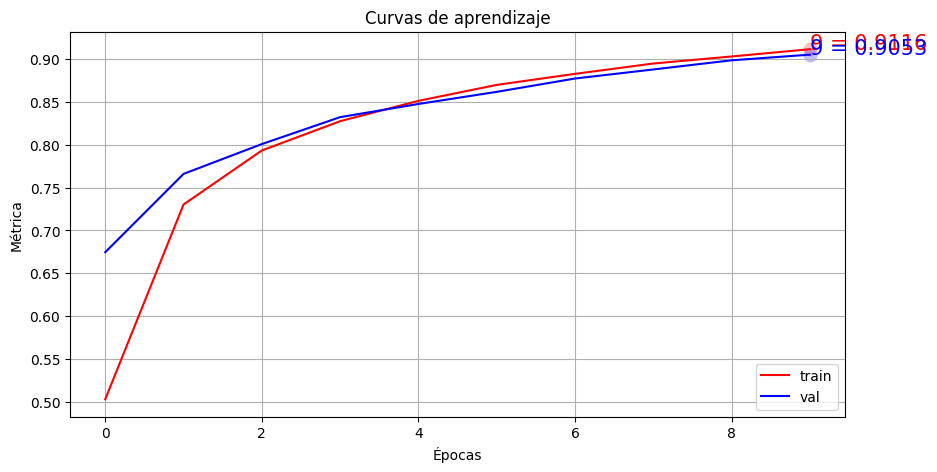

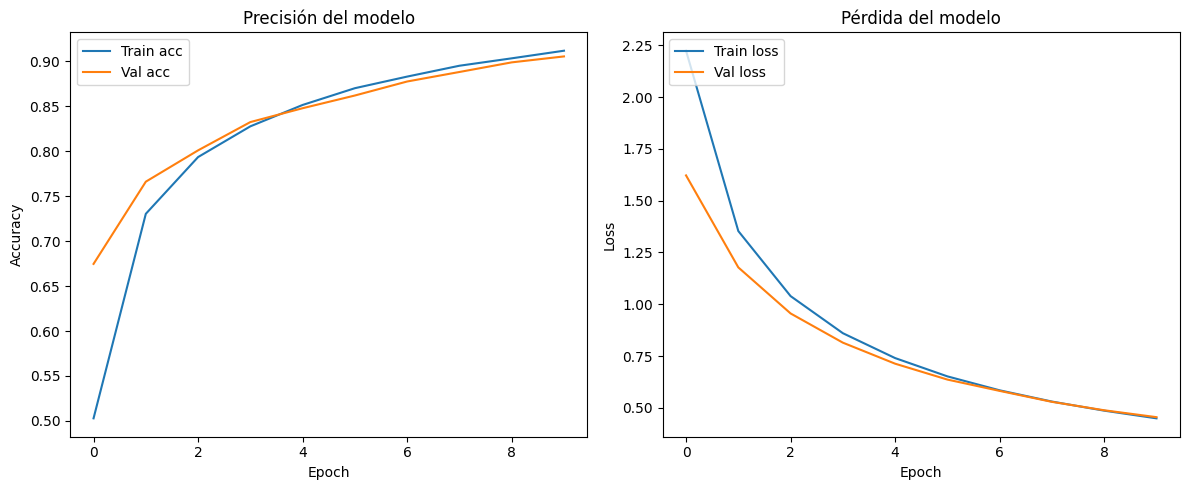

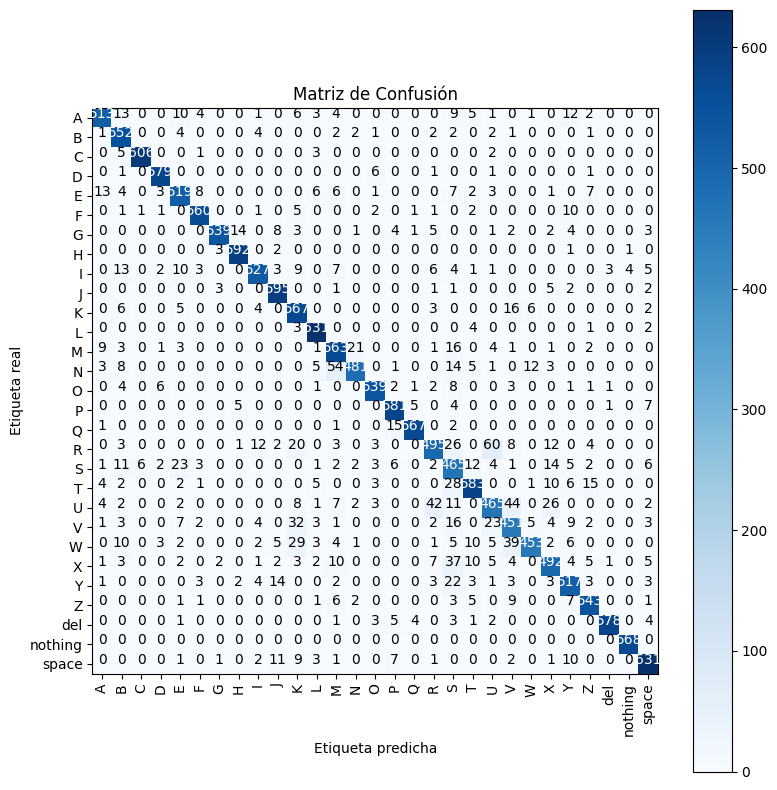

In [27]:
model = pretrainedNetwork(
    X_train, y_train_hot,
    X_test, y_test_hot,
    base_model=pretrained_model_vgg,
    classweight=class_weight1,
    numclasses=num_classes,
    numepochs=10,
    optimizer=optimizer1,
    labels=map_characters1  
)


In [28]:
model.save("model_signs.keras")
print("Modelo guardado como model-gestos.keras")

Modelo guardado como model-gestos.keras


Predicción: K (Confianza: 72.33%)


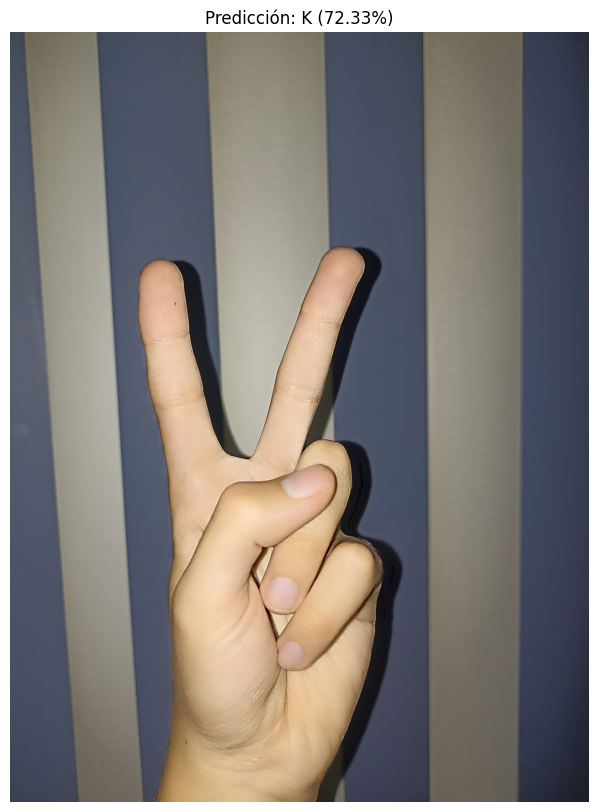

In [66]:
#probar el modelo con una imagen
 # o "model_signs.h5" si así lo guardaste
model

def classify_image(img_path):
    """
    Carga una imagen desde 'img_path', la redimensiona a 50x50,
    la normaliza y la pasa por el modelo de señas.
    Imprime por pantalla la clase predicha y la confianza.
    """
    # Lee la imagen con OpenCV
    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        print(f"Error: no se pudo leer la imagen en: {img_path}")
        return
  
    img_resized = cv2.resize(img_bgr, (50, 50))
    img_float = img_resized.astype("float32") / 255.0

    img_expanded = np.expand_dims(img_float, axis=0)

    preds = model.predict(img_expanded, verbose=0)[0]


    class_index = np.argmax(preds)
    confidence = preds[class_index]

   
    predicted_label = map_characters[class_index]

   
    print(f"Predicción: {predicted_label} (Confianza: {confidence*100:.2f}%)")


    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Predicción: {predicted_label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

# EJEMPLO: Clasificar una imagen local
test_image_path = "Data/mano3.jpg"
classify_image(test_image_path)

